In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Load dataset from URL
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_data = pd.read_csv(url)

In [3]:
# Display first few rows of the dataset
print(titanic_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [4]:
# Check for missing values
print(titanic_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Fill missing values
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)

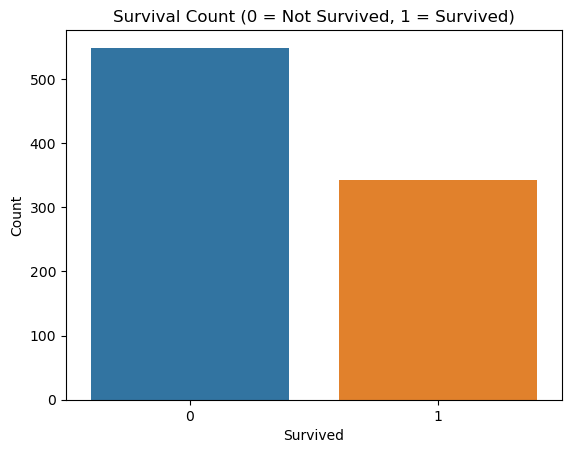

In [6]:
# Visualizations
# Bar plot of survival counts
sns.countplot(x='Survived', data=titanic_data)
plt.title('Survival Count (0 = Not Survived, 1 = Survived)')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

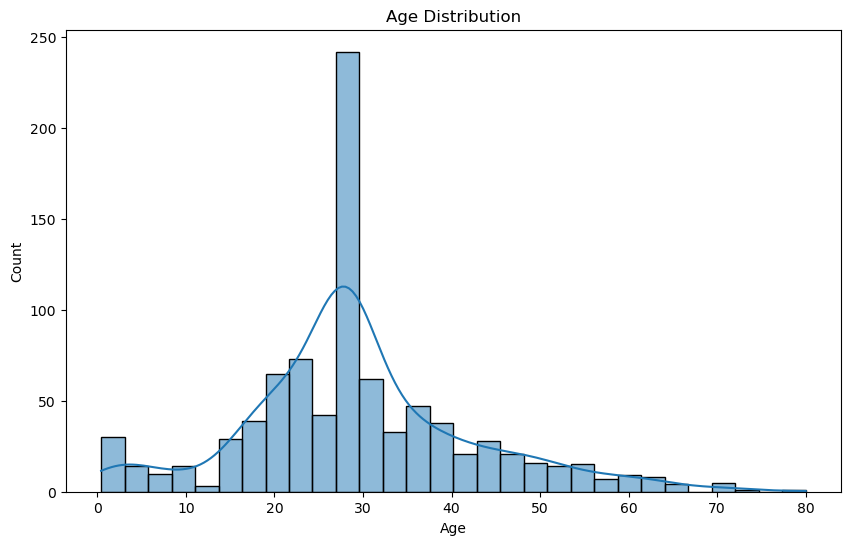

In [7]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Age', bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

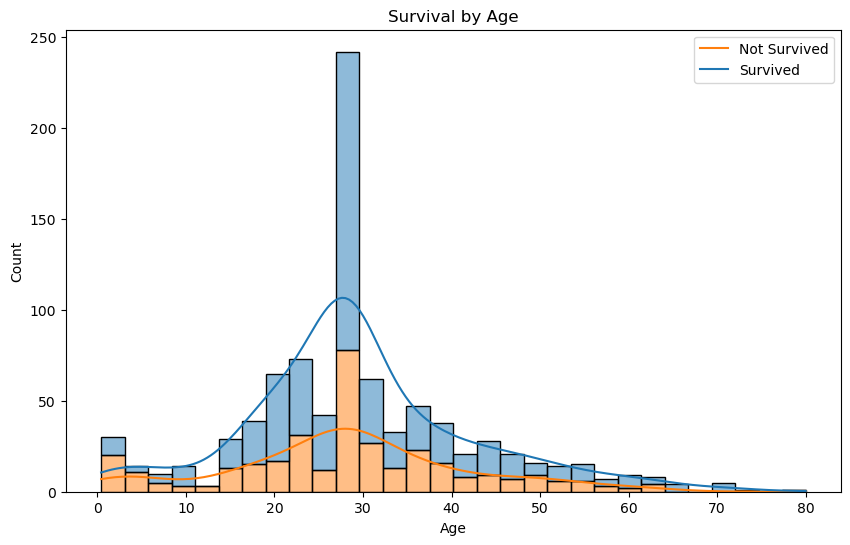

In [8]:
# Survival by age
plt.figure(figsize=(10, 6))
sns.histplot(data=titanic_data, x='Age', hue='Survived', bins=30, kde=True, multiple='stack')
plt.title('Survival by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(labels=['Not Survived', 'Survived'])
plt.show()

In [9]:
# Feature selection and data encoding
X = titanic_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
y = titanic_data['Survived']

In [10]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Model training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8212290502793296


In [13]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[91 14]
 [18 56]]


# Summary 
The Titanic Survival Prediction project aims to analyze the Titanic dataset, containing information about passengers such as age, gender, ticket class, fare, and survival status, to build a model predicting whether a passenger survived the Titanic disaster. Through data exploration, preprocessing, and visualization, key insights into factors influencing survival are uncovered. Using a RandomForestClassifier, the project trains a machine learning model on the processed data to predict survival outcomes accurately. Evaluation metrics like accuracy and confusion matrix are utilized to assess model performance. This project serves as a comprehensive demonstration of data preprocessing, exploratory data analysis, visualization techniques, and machine learning model building in Python for survival prediction tasks.